<a href="https://colab.research.google.com/github/varuncanamedi3301/Control-Systems-Simulation/blob/main/PCS_AAT_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. STEP RESPONSE OF A SYSTEM(TIME-DOMAIN ANALYSIS) :-



Unit- step signal is one of the most common inputs to study the response characteristics of a system with transfer function H(s)
We can easily find the step input of a system from its transfer function.  Given a system with input x(t), output y(t) and transfer function H(s),

            ##           H(s)=Y(s)/X(s)

the output with zero initial conditions (i.e., the zero state output) is simply given by,

     ##                        Y(s)=X(s)⋅H(s)

so the unit step response, Yγ(s), is given by,

     ##                   Yγ(s)=1/s⋅H(s)
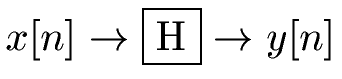

Let us define a transfer function,
           ##             G1(s) = s*(s+3)/(s+1)*(s+11)*(s+7)

In [ ]:
!pip3 install control

     |████████████████████████████████| 339 kB 7.6 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344929 sha256=25c49330a8e2fe743c63040ab4c19ff38068eaf675b6b47f0c1292ffb408e3bf
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


In [ ]:
import control as co
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

In [16]:
s = co.tf('s')
G1 = (s*(s+3)/((s+1)*(s+11)*(s+7)))
print(G1)


       s^2 + 3 s
------------------------
s^3 + 19 s^2 + 95 s + 77



## Representation of Input

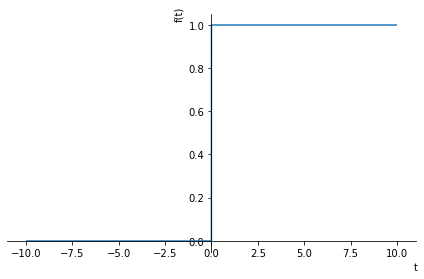

In [ ]:
t = sp.symbols('t')
x = sp.Piecewise((0, t<0), (1, t>0))
sp.plot(x)

## Plotting the Step-Response

Text(0.5, 1.0, 'STEP RESPONSE')

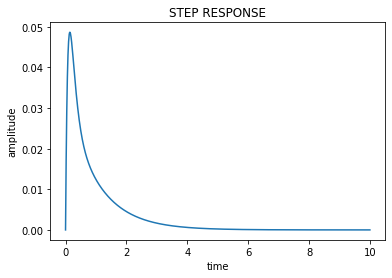

In [17]:
t = np.linspace(0,10,1000)
_, y = co.step_response(G1,t)
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.title('STEP RESPONSE')

# 2. BODE PLOT (FREQUENCY DOMAIN ANALYSIS)

A Bode plot is a graphical representation of a linear, time-invariant system transfer function. In a linear system, any sinusoidal that inputs the system is only changed in magnitude, when it is amplified or attenuated, and phase, when delayed. Therefore, the system can be described for every frequency, just by its gain and phase shift. The bode plots simply trace the gain and phase shift of the system to a range of frequencies. There are two bode plots, one plotting the magnitude (or gain) versus frequency (Bode Magnitude plot) and another plotting the phase versus frequency (Bode Phase plot).

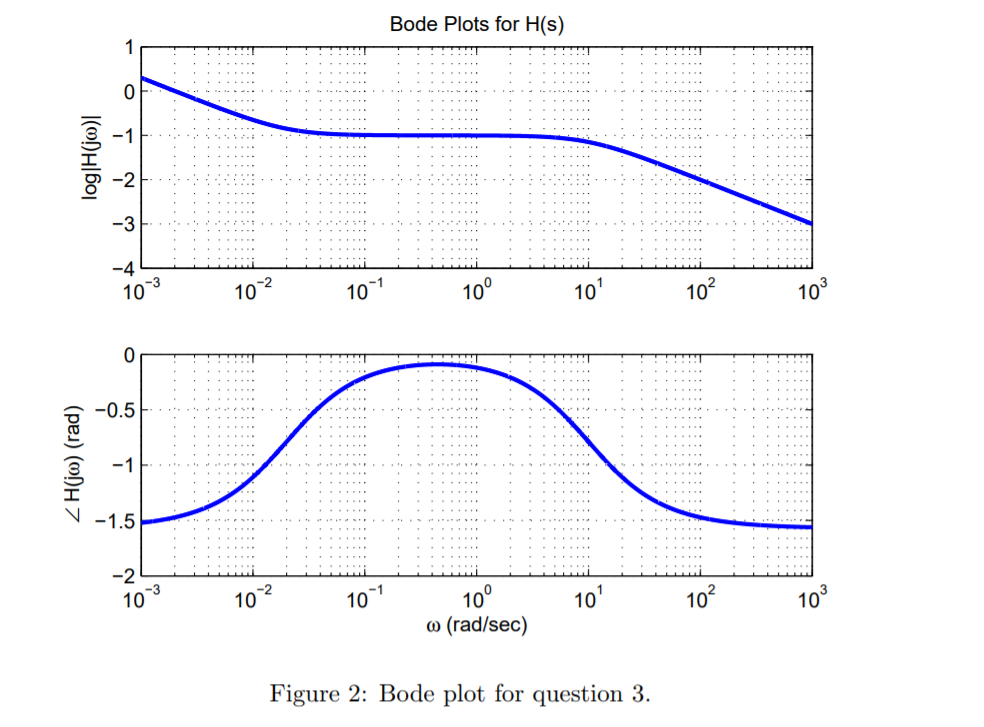

## Bode plot simulation 

Consider a system with Transfer function H(s),

       ##         H(s) = 100*(s+1)/(s+10)*(s+100)
let us construct the Bode plot for the above system

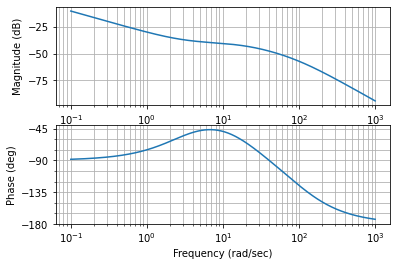

In [18]:
G2 = (20*(s+3))/(s*(s+20)*(s+100))
co.bode_plot(G2, dB = True,);

# 3. EFFECT OF DAMPING RATIO ON STEP RESPONSE :-

Damping is an influence within or upon an oscillatory system that has the effect of reducing or preventing its oscillation.


The damping ratio is a dimensionless measure describing how oscillations in a system decay after a disturbance. Many systems exhibit oscillatory behavior when they are disturbed from their position of static equilibrium.


The damping ratio is a system parameter, denoted by ζ (zeta), that can vary from undamped (ζ = 0), underdamped (ζ < 1) through critically damped (ζ = 1) to overdamped (ζ > 1). 
             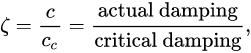

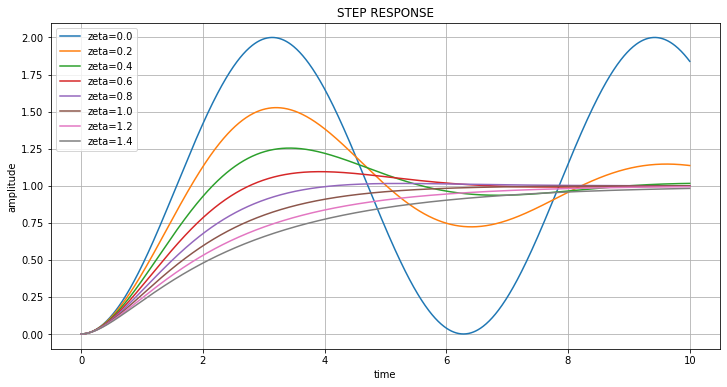

In [ ]:
t = np.linspace(0,10,1000)
plt.figure(figsize=(12,6))
for zeta in np.arange(0,1.6,0.2):
  G = co.tf([1], [1,2*zeta, 1])
  _,y = co.step_response(G,t)
  plt.plot(t,y, label=f'zeta={zeta:0.2}')
plt.xlabel("time")
plt.ylabel('amplitude')
plt.title('STEP RESPONSE')
plt.legend()
plt.grid()